**Name:** Cristian Pérez

**Github:** https://github.com/Cristianperezd


---




# **Library requirements**


---



*   lazypredict
*   pandas
*   matplotlib
*   seaborn
*   sklearn
* numpy


---















In [78]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV






# **Dataset**

## TV shows on Netflix, Prime Video, Hulu and Disney+

---

https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney



In [3]:
url = 'https://raw.githubusercontent.com/Cristianperezd/APC-Kaggle/main/tv_shows.csv'
db = pd.read_csv(url)

# **Data Processing & Visualization**


---



First of all lets define every atribute based on the information in the kaggle:


---



*   **Unnamed: 0** : Row ID
*   **ID** : Unique TV show ID
*   **Title** : Title of Movie/Show
*   **Year** : The year in which the tv show was produced
*   **Age** : Target age group
*   **IMDb** : IMDb rating
*   **Rotten Tomatoes** : Rotten Tomatoes rating
*   **Netflix** : Whether the tv show is found on Netflix
*   **Hulu** : Whether the tv show is found on Hulu
*   **Prime Video** : Whether the tv show is found on Prime Video
*   **Disney+** : Whether the tv show is found on Disney+
*   **Type** : Movie or TV Show






After this, we check basic information of the dataset like the shape of the dataset, the first rows for getting a first impression and checking the types of the atributes.

In [4]:
db.shape

(5368, 12)

In [5]:
db.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


We can see that the column Age and IMDb are the only one to get Null columns, and there are a few columns that are not number type.


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


In [7]:
db.describe()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00
mean,2683.50,2814.95,2012.63,0.37,0.30,0.34,0.07,1.00
std,1549.75,1672.39,10.14,0.48,0.46,0.47,0.25,0.00
min,0.00,1.00,1904.00,0.00,0.00,0.00,0.00,1.00
25%,1341.75,1345.75,2011.00,0.00,0.00,0.00,0.00,1.00
50%,2683.50,2788.00,2016.00,0.00,0.00,0.00,0.00,1.00
75%,4025.25,4308.25,2018.00,1.00,1.00,1.00,0.00,1.00
max,5367.00,5717.00,2021.00,1.00,1.00,1.00,1.00,1.00


Checking the nulls of the dataset and their percentage:



In [8]:
pd.DataFrame({'Total missing values':db.isna().sum(),
              'Percentage':(db.isna().sum()/len(db))*100})

,Total missing values,Percentage
Unnamed: 0,0,0.00
ID,0,0.00
Title,0,0.00
Year,0,0.00
Age,2127,39.62
IMDb,962,17.92
Rotten Tomatoes,0,0.00
Netflix,0,0.00
Hulu,0,0.00
Prime Video,0,0.00


A large number of nulls can be seen considering that the size of the dataset is 5300 rows.


The following graph shows the relationship between the nulls in the table and it can be seen that most of the time when there are nulls in IMDb there are also nulls in Age.

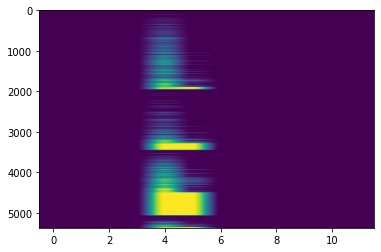

In [9]:
plt.imshow(db.isnull(),aspect='auto')

To check this we make a matrix to see how many nulls occur in the two attributes at the same time.

In [10]:
df1 = db.isna()
pd.crosstab(df1.Age, df1.IMDb)


IMDb,False,True
Age,,
False,3207,34
True,1199,928


It can be seen that in 928 rows IMDb and Age are nulls at the same time.
Considering that IMDb nulls are 962, we can see that there is a clear relationship between IMDb and Age nulls.
Looking at these particular cases in more detail, we can see that no logic can be used for filling in the nulls and therefore these rows will be dropped.

In [11]:
db1 = db.dropna(subset=['Age','IMDb'], how='all')




In [12]:
pd.DataFrame({'Total missing values':db1.isna().sum(),
              'Percentage':(db1.isna().sum()/len(db1))*100})

,Total missing values,Percentage
Unnamed: 0,0,0.00
ID,0,0.00
Title,0,0.00
Year,0,0.00
Age,1199,27.00
IMDb,34,0.77
Rotten Tomatoes,0,0.00
Netflix,0,0.00
Hulu,0,0.00
Prime Video,0,0.00


In [13]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440 entries, 0 to 5357
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4440 non-null   int64 
 1   ID               4440 non-null   int64 
 2   Title            4440 non-null   object
 3   Year             4440 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  4440 non-null   object
 7   Netflix          4440 non-null   int64 
 8   Hulu             4440 non-null   int64 
 9   Prime Video      4440 non-null   int64 
 10  Disney+          4440 non-null   int64 
 11  Type             4440 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 450.9+ KB


Next I will check if the Age nulls follow some kind of pattern by searching the internet for their actual rating, and I have not been able to find any kind of relationship, and therefore all the nulls will be dropped.

In [14]:
db1[db1.isnull().any(axis=1)]

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
120,120,121,Bridgerton,2020,NaN,7.3/10,79/100,1,0,0,0,1
199,199,200,The Haunting of Bly Manor,2020,NaN,7.4/10,74/100,1,0,0,0,1
203,203,204,Young Royals,2021,NaN,8.6/10,74/100,1,0,0,0,1
243,243,244,Better Than Us,2018,NaN,7.4/10,72/100,1,0,0,0,1
250,250,251,Flowers,2016,NaN,8.2/10,72/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5337,5337,5685,Rocky Mountain Animal Rescue,2018,NaN,7.9/10,30/100,0,0,0,1,1
5338,5338,5686,Wild Nordic,2019,NaN,6.0/10,30/100,0,0,0,1,1
5343,5343,5692,Jungle Animal Rescue,2020,NaN,6.4/10,28/100,0,0,0,1,1
5348,5348,5697,Party Animals,2016,all,NaN,19/100,0,0,0,1,1


In [15]:
db1 = db1.dropna(subset=['IMDb'])


In [16]:
pd.DataFrame({'Total missing values':db1.isna().sum(),
              'Percentage':(db1.isna().sum()/len(db1))*100})

,Total missing values,Percentage
Unnamed: 0,0,0.00
ID,0,0.00
Title,0,0.00
Year,0,0.00
Age,1199,27.21
IMDb,0,0.00
Rotten Tomatoes,0,0.00
Netflix,0,0.00
Hulu,0,0.00
Prime Video,0,0.00


In [17]:
db1 = db1.dropna(subset=['Age'])
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207 entries, 0 to 5342
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3207 non-null   int64 
 1   ID               3207 non-null   int64 
 2   Title            3207 non-null   object
 3   Year             3207 non-null   int64 
 4   Age              3207 non-null   object
 5   IMDb             3207 non-null   object
 6   Rotten Tomatoes  3207 non-null   object
 7   Netflix          3207 non-null   int64 
 8   Hulu             3207 non-null   int64 
 9   Prime Video      3207 non-null   int64 
 10  Disney+          3207 non-null   int64 
 11  Type             3207 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 325.7+ KB


We also need to convert the columns IMDb and Rotten Tomatoes to numbers:

In [18]:

if db1.dtypes['IMDb'] == object:
  db1["IMDb"] = db1["IMDb"].str.split("/").str[0]
  db1["Rotten Tomatoes"] = db1["Rotten Tomatoes"].str.split("/").str[0]

  db1["IMDb"] = pd.to_numeric(db1["IMDb"])
  db1["Rotten Tomatoes"] = pd.to_numeric(db1["Rotten Tomatoes"])/10

db1.head()


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.40,10.00,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.70,9.60,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.00,9.50,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.80,9.40,1,0,0,0,1
4,4,5,Dark,2017,16+,8.80,9.30,1,0,0,0,1


In [19]:
db1.describe()

,Unnamed: 0,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
count,3207.00,3207.00,3207.00,3207.00,3207.00,3207.00,3207.00,3207.00,3207.00,3207.00
mean,2231.94,2327.79,2011.94,7.13,5.77,0.41,0.38,0.23,0.08,1.00
std,1445.81,1549.52,10.31,1.09,1.38,0.49,0.48,0.42,0.27,0.00
min,0.00,1.00,1934.00,1.10,2.40,0.00,0.00,0.00,0.00,1.00
25%,932.50,935.50,2010.00,6.60,4.70,0.00,0.00,0.00,0.00,1.00
50%,2240.00,2294.00,2015.00,7.30,5.60,0.00,0.00,0.00,0.00,1.00
75%,3243.00,3375.00,2018.00,7.90,6.70,1.00,1.00,0.00,0.00,1.00
max,5342.00,5691.00,2021.00,9.60,10.00,1.00,1.00,1.00,1.00,1.00


In [20]:
duplicados = db1["Title"].duplicated()

print(duplicados.sum())

0


Finally, we can see that there are 4 columns that will not be useful on our research so we drop them:


*   Unnamed: 0 : Does not give relevant information
*   Id: Does not give relevant information
*   Title: It can not be used on our models for training
*   Type: It is always 1



In [21]:
db1 = db1.drop(columns=["Unnamed: 0", "ID", "Title",'Type'])


In [22]:
db1 = pd.get_dummies(db1, columns=['Age'])
db1.head()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Age_13+,Age_16+,Age_18+,Age_7+,Age_all
0,2008,9.40,10.00,1,0,0,0,0,0,1,0,0
1,2016,8.70,9.60,1,0,0,0,0,1,0,0,0
2,2013,9.00,9.50,1,1,0,0,0,0,1,0,0
3,2015,8.80,9.40,1,0,0,0,0,0,1,0,0
4,2017,8.80,9.30,1,0,0,0,0,1,0,0,0


In [23]:


#db1['Age'] = pd.concat([db1['Age_13+'], db1['Age_16+'],db1['Age_18+'],db1['Age_7+'],db1['Age_all']], axis = 1)
db1['Age'] = db1['Age_13+'].astype(str)+ db1['Age_16+'].astype(str) + db1['Age_18+'].astype(str) + db1['Age_7+'].astype(str) + db1['Age_all'].astype(str)

db1["Age"] = pd.to_numeric(db1["Age"])


db1 = db1.drop(columns=['Age_13+','Age_16+','Age_18+','Age_7+','Age_all'])

db1.head()



,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Age
0,2008,9.40,10.00,1,0,0,0,100
1,2016,8.70,9.60,1,0,0,0,1000
2,2013,9.00,9.50,1,1,0,0,100
3,2015,8.80,9.40,1,0,0,0,100
4,2017,8.80,9.30,1,0,0,0,1000


In [24]:
db1['Age'].value_counts()



1000     987
100      852
10       824
1        535
10000      9
Name: Age, dtype: int64

We move on to analyse the correlation matrix, where we can see a strong correlation between Rotten Tomatoes and IMDb, which makes sense since they are both ratings values.

An interesting correlation can also be seen in the correlation between the year of release and appearance on Netflix.


Text(0.5, 1.0, 'Correlation ')

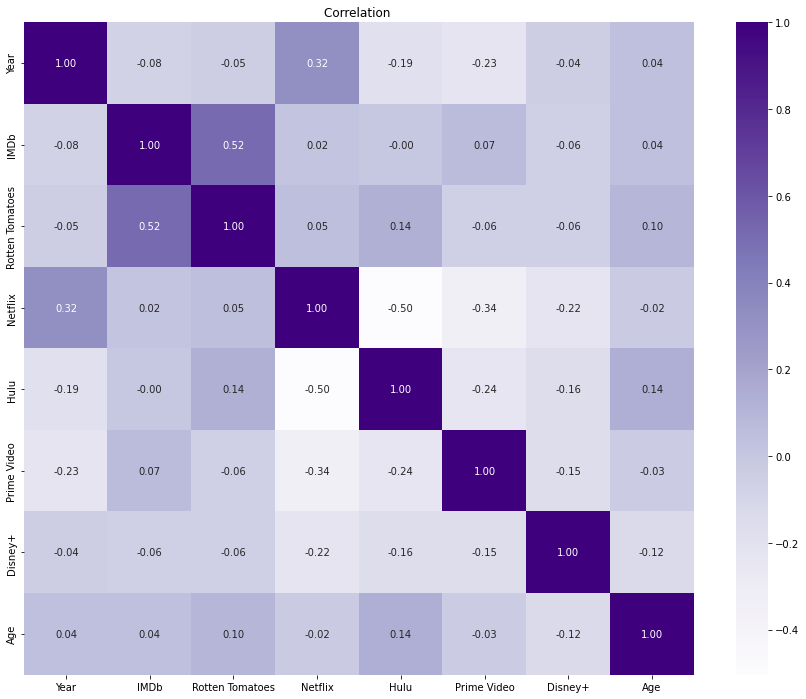

In [25]:
corr=db1.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples', annot=True,fmt=".2f")
r.set_title("Correlation ")

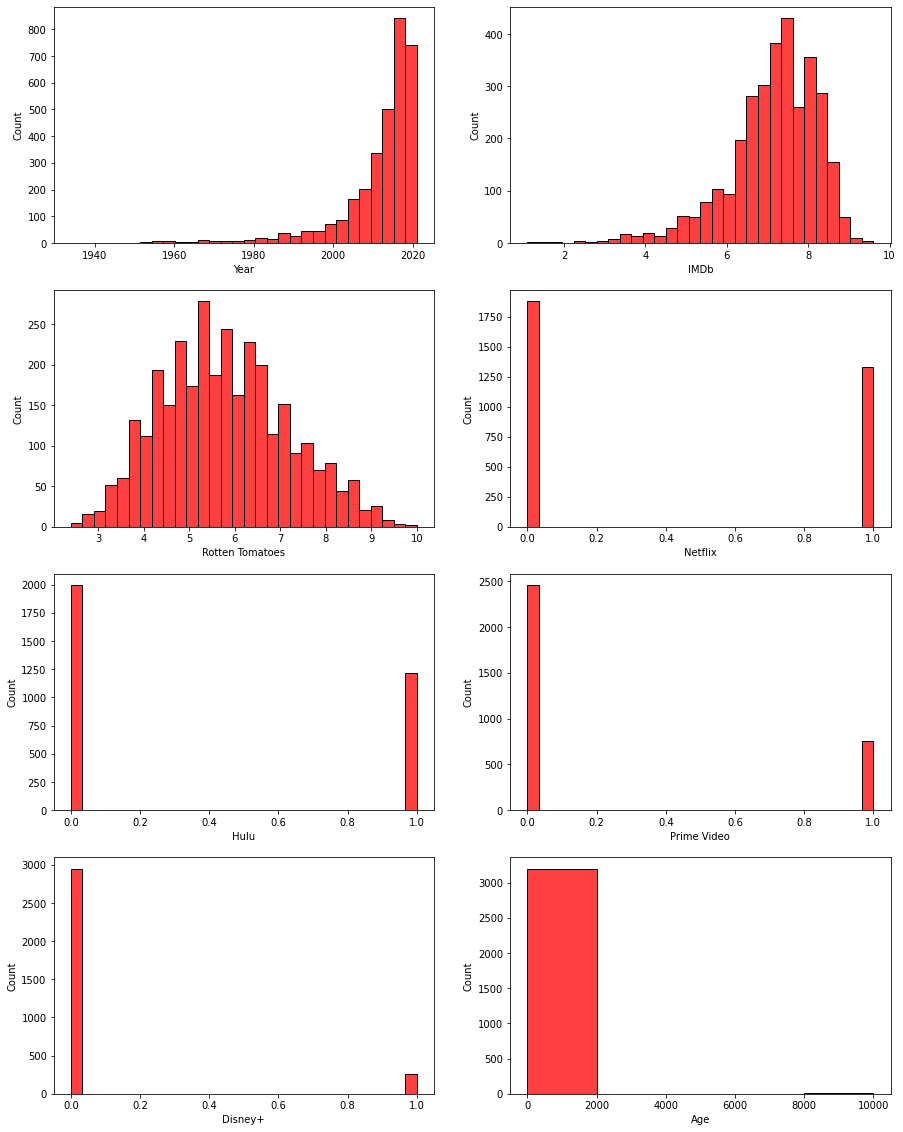

In [26]:
fig, axes = plt.subplots(4,2, figsize=(15,20))
sns.histplot(x=db1['Year'] , color='red',ax=axes[0,0], bins=30)
sns.histplot(x=db1['IMDb'] , color='red',ax=axes[0,1], bins=30)
sns.histplot(x=db1['Rotten Tomatoes'] , color='red',ax=axes[1,0], bins=30)
sns.histplot(x=db1['Netflix'] , color='red',ax=axes[1,1], bins=30)
sns.histplot(x=db1['Hulu'] , color='red',ax=axes[2,0], bins=30)
sns.histplot(x=db1['Prime Video'] , color='red',ax=axes[2,1], bins=30)
sns.histplot(x=db1['Disney+'] , color='red',ax=axes[3,0], bins=30)
sns.histplot(x=db1['Age'] , color='red',ax=axes[3,1], bins=5)

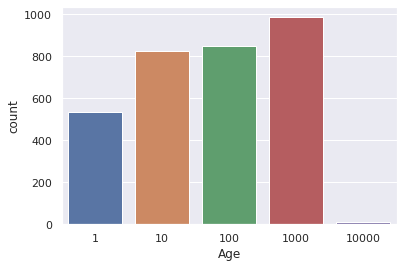

In [27]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Age", data=db1)

After analyzing this charts, Rotten Tomatoes has a Gaussian distribution, while IMDb tends to rank more highly. 

## Model testing


---

Next, I focused on testing how will work different algorithms using different target variables with the library LazyPredict:

In [28]:

X = db1.drop('Age',axis = 1)
y = db1['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|██████████| 29/29 [00:11<00:00,  2.51it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.42,0.34,None,0.42,0.09
LogisticRegression,0.43,0.34,None,0.42,0.23
LGBMClassifier,0.42,0.34,None,0.42,0.81
CalibratedClassifierCV,0.42,0.34,None,0.40,3.19
XGBClassifier,0.43,0.34,None,0.42,0.91
LabelSpreading,0.43,0.33,None,0.42,0.90
LabelPropagation,0.42,0.33,None,0.42,0.64
LinearDiscriminantAnalysis,0.42,0.33,None,0.41,0.06
LinearSVC,0.41,0.33,None,0.39,0.91


In [29]:
X = db1.drop('Netflix',axis = 1)
y = db1['Netflix']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:06<00:00,  4.41it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.95,0.94,0.94,0.95,0.29
LinearDiscriminantAnalysis,0.95,0.94,0.94,0.95,0.10
XGBClassifier,0.95,0.94,0.94,0.95,0.22
CalibratedClassifierCV,0.95,0.94,0.94,0.95,0.71
RidgeClassifierCV,0.95,0.94,0.94,0.95,0.12
RidgeClassifier,0.95,0.94,0.94,0.95,0.04
LogisticRegression,0.95,0.94,0.94,0.95,0.09
RandomForestClassifier,0.95,0.94,0.94,0.95,0.62
LGBMClassifier,0.95,0.94,0.94,0.95,0.33


In [30]:
X = db1.drop('Rotten Tomatoes',axis = 1)
y = db1['Rotten Tomatoes']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

In [31]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

 98%|█████████▊| 41/42 [03:35<00:05,  5.53s/it]

[16:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [03:35<00:00,  5.12s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.43,0.43,1.03,0.26
XGBRegressor,0.43,0.43,1.03,0.16
LGBMRegressor,0.40,0.40,1.06,0.08
HistGradientBoostingRegressor,0.39,0.40,1.06,1.82
AdaBoostRegressor,0.37,0.37,1.09,0.21
RandomForestRegressor,0.35,0.36,1.10,0.53
BaggingRegressor,0.33,0.34,1.11,0.13
MLPRegressor,0.31,0.31,1.13,2.78
NuSVR,0.31,0.31,1.14,0.38


In [32]:
X = db1.drop('Year',axis = 1)
y = db1['Year']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

 98%|█████████▊| 41/42 [03:31<00:05,  5.63s/it]

[16:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [03:31<00:00,  5.04s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.24,0.25,8.64,0.18
XGBRegressor,0.23,0.24,8.68,0.16
HistGradientBoostingRegressor,0.19,0.20,8.91,0.36
LGBMRegressor,0.19,0.20,8.91,0.08
SGDRegressor,0.15,0.15,9.15,0.06
LassoCV,0.15,0.15,9.15,0.12
LassoLarsIC,0.15,0.15,9.15,0.02
LarsCV,0.15,0.15,9.15,0.05
Lars,0.15,0.15,9.15,0.03


## **Target Value**

---
Finally, the variable to predict will be the Rotting Tomatoes score, as I think it might be interesting how well it can be predicted from the other attributes such as the IMDb score.


# **Model Selection** 

---

In this section, I will first test the 3 best models according to the results obtained previously from the LazyPredict library:
* GradientBoostingRegressor
* AdaBoostRegressor	
* RandomForestRegressor	


You will notice that I have not chosen 3 algorithms that were better than the last 2, and it is because they are a different implementation of GradientBoosting that in this particular problem would not work well.

In [62]:

X = db1.drop('Rotten Tomatoes',axis = 1)
y = db1['Rotten Tomatoes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)



In [34]:
gbr = GradientBoostingRegressor(random_state = 123)
abr = AdaBoostRegressor(random_state=123)
rfr = RandomForestRegressor(random_state=123)

In [35]:
def fit_model(model,x,y):
  return model.fit(x,y)

In [72]:
gbr = fit_model(gbr, X_train, y_train)
abr = fit_model(abr, X_train, y_train)
rfr = fit_model(rfr, X_train, y_train)



## **Validation with Train set**


---
First of all, we are going to check our models with the train set using R2 Score, MSE and plotting the results:


In [37]:
score = gbr.score(X_train, y_train)
print("Score of GradientBoostingRegressor with Train Set: ", score)
score = abr.score(X_train, y_train)
print("Score of AdaBoostRegressor with Train Set: ", score)
score = rfr.score(X_train, y_train)
print("Score of RandomForestRegressor with Train Set: ", score)




Score of GradientBoostingRegressor with Train Set:  0.5142390825321609
Score of AdaBoostRegressor with Train Set:  0.41263310376710327
Score of RandomForestRegressor with Train Set:  0.8374899029313547


In [38]:

print(mean_squared_error(gbr.predict(X_train), y_train))
print(mean_squared_error(abr.predict(X_train), y_train))
print(mean_squared_error(rfr.predict(X_train), y_train))

0.9320077593398691
1.1269546091152536
0.31180085921399914


We can see that the best model at the moment it is RandomForestRegressor, but we will need to check with the Test set for checking that is not overfitting.

[Text(0.5, 0, 'Predicted Values')]

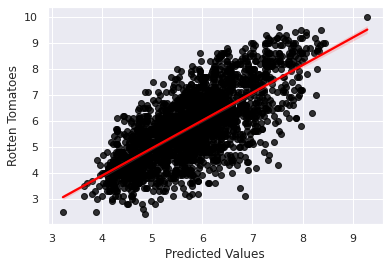

In [39]:
ax = sns.regplot(x=gbr.predict(X_train), y=y_train, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

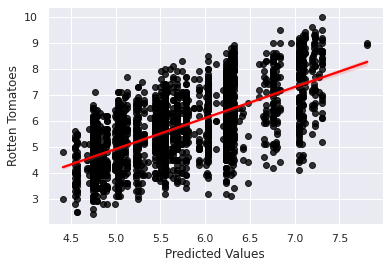

In [40]:
ax = sns.regplot(x=abr.predict(X_train), y=y_train, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

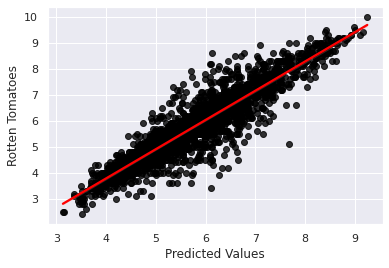

In [41]:
ax =sns.regplot(x=rfr.predict(X_train), y=y_train, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

## **Validation with Test set**


---



In [42]:
score = gbr.score(X_test, y_test)
print("Score of GradientBoostingRegressor with test Set: ", score)
score = abr.score(X_test, y_test)
print("Score of AdaBoostRegressor with test Set: ", score)
score = rfr.score(X_test, y_test)
print("Score of RandomForestRegressor with test Set: ", score)

Score of GradientBoostingRegressor with test Set:  0.4328053708492027
Score of AdaBoostRegressor with test Set:  0.37644222571593067
Score of RandomForestRegressor with test Set:  0.3516929025926584


In [43]:
print(mean_squared_error(gbr.predict(X_test), y_test))
print(mean_squared_error(abr.predict(X_test), y_test))
print(mean_squared_error(rfr.predict(X_test), y_test))

1.063595974868201
1.169287409895387
1.215697017994173


[Text(0.5, 0, 'Predicted Values')]

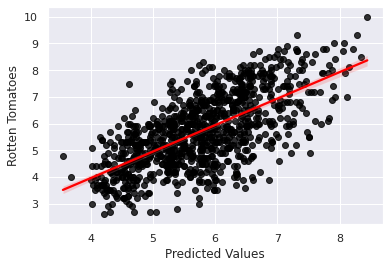

In [73]:
ax = sns.regplot(x=gbr.predict(X_test), y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

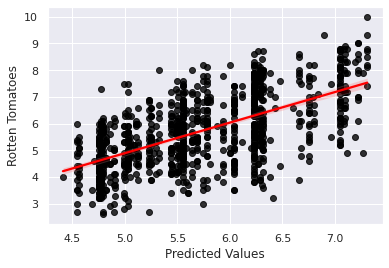

In [74]:
ax = sns.regplot(x=abr.predict(X_test), y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

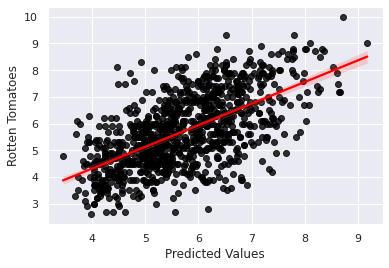

In [75]:
ax = sns.regplot(x=rfr.predict(X_test), y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

We can see that, RandomForest was probabably overfitting because the results with the Test set are worse than with the Train set. Also, GradientBoosting is the best model at the moment without tuning the hyperparameters and not using crossvalidation.


In [48]:
gbr = GradientBoostingRegressor(random_state = 123)
abr = AdaBoostRegressor(random_state=123)
rfr = RandomForestRegressor(random_state=123)

In [77]:
score = cross_val_score(gbr,X,y,cv= 5)

print("Score of GradientBoostingRegressor with test Set: ", score.mean())
score = cross_val_score(abr,X,y,cv= 5)
print("Score of AdaBoostRegressor with test Set: ", score.mean())
score = cross_val_score(rfr,X,y,cv= 5)
print("Score of RandomForestRegressor with test Set: ", score.mean())

Score of GradientBoostingRegressor with test Set:  -2.2273015984007367
Score of AdaBoostRegressor with test Set:  -1.2417913094557935
Score of RandomForestRegressor with test Set:  -2.7268919949615578


[Text(0.5, 0, 'Predicted Values')]

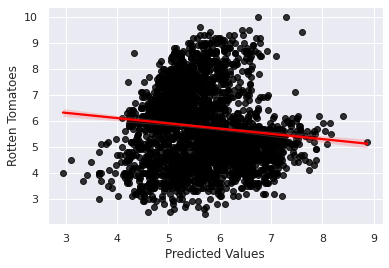

In [67]:
ax = sns.regplot(x=cross_val_predict(gbr,X,y,cv=5), y=y, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

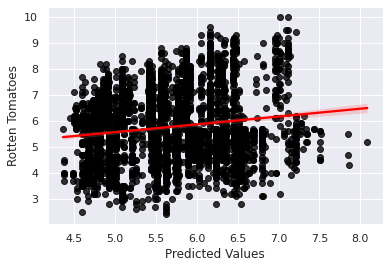

In [68]:
ax = sns.regplot(x=cross_val_predict(abr,X,y,cv=5), y=y, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

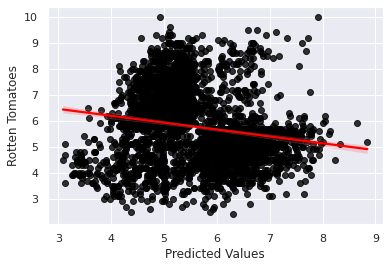

In [69]:
ax = sns.regplot(x=cross_val_predict(rfr,X,y,cv=5), y=y, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

After testing the crossvalidation, it is giving worse results than without it, so the next step will be Hyperparameters search with gridsearchcv.

# **Hyperparameters search**


---



In [ ]:
gbr = GradientBoostingRegressor(random_state = 123)
abr = AdaBoostRegressor(random_state=123)
rfr = RandomForestRegressor(random_state=123)

In [79]:
parameters_gbr = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters_gbr, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [81]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=123, subsample=0.5)

 The best score across ALL searched params:
 0.4456220744734035

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


In [82]:
parameters_abr = { 'n_estimators': [20,30,50,70,100],
                    'learning_rate': [0.01, 0.02, 0.03, 0.04]      , 
                 }
grid_ABR = GridSearchCV(estimator=abr, param_grid = parameters_abr, cv = 5, n_jobs=-1)
grid_ABR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=123), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [20, 30, 50, 70, 100]})

In [83]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_ABR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_ABR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_ABR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostRegressor(learning_rate=0.04, n_estimators=100, random_state=123)

 The best score across ALL searched params:
 0.3911508309969638

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'n_estimators': 100}


In [84]:
parameters_RFR = { 'n_estimators': [30,50,70,100,120],
                    'max_depth': [4, 6, 8, 10] , 
                  'min_samples_split': [1, 2, 3]
                 }
grid_RFR = GridSearchCV(estimator=rfr, param_grid = parameters_RFR, cv = 5, n_jobs=-1)
grid_RFR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [30, 50, 70, 100, 120]})

In [85]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RFR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RFR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=6, random_state=123)

 The best score across ALL searched params:
 0.42774722249328834

 The best parameters across ALL searched params:
 {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}


Once we have the best hyperparameters, we proceed to train the models again and test them.

In [88]:
gbr = GradientBoostingRegressor(random_state = 123,learning_rate = 0.01,max_depth = 4, n_estimators =  500, subsample = 0.5)
abr = AdaBoostRegressor(random_state=123, learning_rate =  0.04, n_estimators = 100)
rfr = RandomForestRegressor(random_state=123, max_depth =  6, min_samples_split =  2, n_estimators =  100)




In [90]:
gbr = fit_model(gbr, X_train, y_train)
abr = fit_model(abr, X_train, y_train)
rfr = fit_model(rfr, X_train, y_train)

In [92]:
score = gbr.score(X_test, y_test)
print("Score of GradientBoostingRegressor with test Set: ", score)
score = abr.score(X_test, y_test)
print("Score of AdaBoostRegressor with test Set: ", score)
score = rfr.score(X_test, y_test)
print("Score of RandomForestRegressor with test Set: ", score)

Score of GradientBoostingRegressor with test Set:  0.43453279312742166
Score of AdaBoostRegressor with test Set:  0.37413297632041576
Score of RandomForestRegressor with test Set:  0.424212762982215


In [93]:
print(mean_squared_error(gbr.predict(X_test), y_test))
print(mean_squared_error(abr.predict(X_test), y_test))
print(mean_squared_error(rfr.predict(X_test), y_test))

1.0603567351300494
1.1736176842594335
1.0797087211306822


[Text(0.5, 0, 'Predicted Values')]

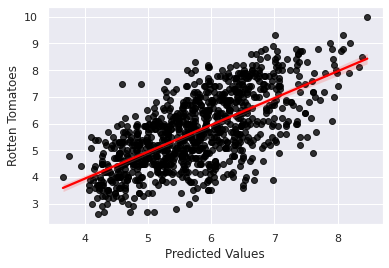

In [94]:
ax = sns.regplot(x=gbr.predict(X_test), y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

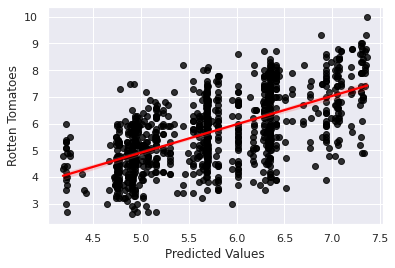

In [95]:
ax = sns.regplot(x=abr.predict(X_test), y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

[Text(0.5, 0, 'Predicted Values')]

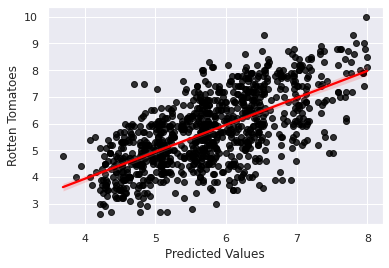

In [96]:
ax = sns.regplot(x=rfr.predict(X_test), y=y_test, scatter_kws={"color": "black"}, line_kws={"color":"red"})
ax.set(xlabel = "Predicted Values")

It can be seen that the GradientBoostingRegressor model with the best hyperparameters offers almost the same results with the default hyperparameters.
On the other hand, in the RandomForestRegressor model a great improvement can be seen.

# **Conclusion**


---
As a final conclusion, the best model obtained is with the GradientBoostingRegressor algorithm, although the RandomForestRegressor provides very similar results.

It should also be noted that crossvalidation was not useful in this dataset.

Finally, it is worth mentioning that in case we want to get better results, we could train the model by extending the dataset with the IMDb and Rotten Tomatoes APIs.
